<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/Image_Segmentation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

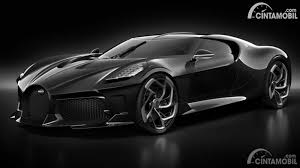

In [2]:
img = cv2.imread('CARs.jpg', 0)
cv2_imshow(img)

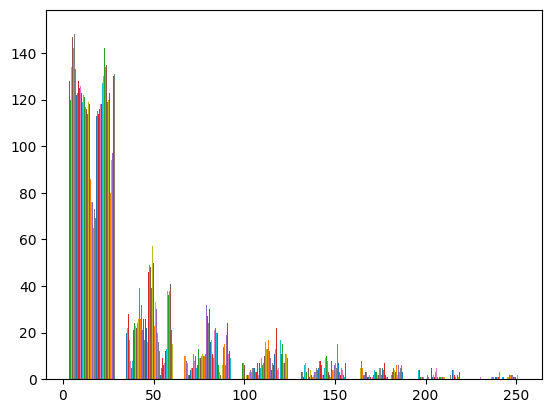

In [3]:
x = img
plt.hist(x, bins=8)
plt.show()

In [4]:
img.shape

(168, 300)

# Discontinuity Approach: Edge Detection

In [5]:
smoothing = np.array([[1,1,1],
                      [1,1,1],
                      [1,1,1]])

sharpening = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

filter1 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

filter2 = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

filter3 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

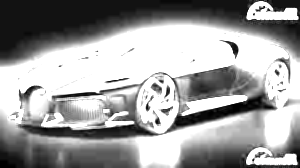

In [6]:
# smoothing
smooth_img = cv2.filter2D(img, ddepth=-1, kernel=smoothing)
cv2_imshow(smooth_img)

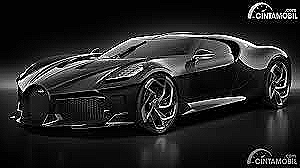

In [7]:
# Sharpening
sharp_img = cv2.filter2D(img, ddepth=-1, kernel=sharpening)
cv2_imshow(sharp_img)

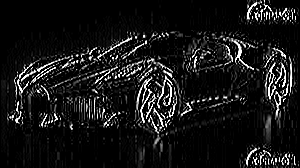

In [8]:
# Sobel Filter
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter1)
cv2_imshow(edge_img)

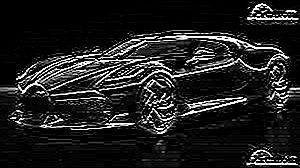

In [9]:
# Sobel Filter
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter2)
cv2_imshow(edge_img)

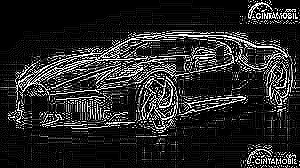

In [10]:
# Edge Detection
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter3)
cv2_imshow(edge_img)

## Algoritma Canny

Algoritma Canny dikenal memiliki tingkat kesalahan yang rendah dan menghasilkan citra tepian yang optimal. Dalam penelitian, kinerja algoritma ini menunjukkan akurasi yang lebih tinggi dalam mendeteksi teks pada citra digital dibandingkan dengan metode lain seperti Sobel atau Prewitt.

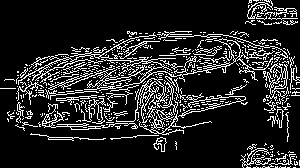

In [11]:
# Canny
edge_img = cv2.Canny(sharp_img, 50, 170)
cv2_imshow(edge_img)

Selanjutnya, hasil edge detection bisa kita implementasikan untuk kasus AI, seperti object detection.

# Similar Approach: Clustering with K-Means

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

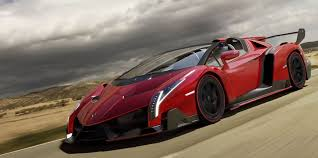

In [13]:
img = cv2.imread('CAR.jpg')
cv2_imshow(img)

In [14]:
# Reshaping image menjadi array 2D: pixel & channel
nilai_pixel = img.reshape((-1,3))

# Ubah menjadi float
nilai_pixel = np.float32(nilai_pixel)

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Definisikan kriteria clustering, akan berhenti jika
# - iterasi mencapai 100
# - akurasi 85%

In [16]:
# Melakukan clustering dengan jumlah cluster = 3
k = 4
retval, labels, centers = cv2.kmeans(nilai_pixel, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# labels = label tiap pixel
# centers = centroid

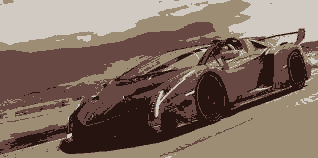

In [17]:
# ubah centroid menjadi int karena image perlu nilai int
centers = np.uint8(centers)

# tetapkan centroid ke tiap label pixel
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))
cv2_imshow(segmented_image)